# **Problem Statement**  
## **6. Solve a real HR dataset to classify attrition using decision trees.**

### Problem Statement

Employee Attrition Prediction Using Decision Trees

The objective is to build a Decision Tree classifier that predicts whether an employee will leave the company (Attrition = Yes/No) based on HR-related features such as age, salary, job role, experience, and work-life balance.

This helps HR teams take proactive retention actions.

### Constraints & Example Inputs/Outputs

### Constraints
- Mixed numerical & categorical features
- Class imbalance (Attrition is usually <20%)
- Missing values may exist
- Model interpretability is critical (HR use case)

### Example Input (Single Employee):
```python
| Age | MonthlyIncome | JobRole         | YearsAtCompany | OverTime |
| --- | ------------- | --------------- | -------------- | -------- |
| 32  | 60000         | Sales Executive | 5              | Yes      |
```

### Expected Output:
```python
| Attrition |
| --------- |
| Yes       |
```

### Solution Approach

**Step 1: Understand Business Problem**
- False negatives are costly (missing employees likely to leave)
- Model must be interpretable
- Decision Trees fit perfectly

**Step 2: ML Framing**
```python
| Item      | Value                              |
| --------- | ---------------------------------- |
| Type      | Binary Classification              |
| Target    | Attrition                          |
| Algorithm | Decision Tree                      |
| Metric    | Accuracy, Recall, Confusion Matrix |
```

**Step 3: Workflow**
1. Load HR dataset
2. Preprocess features
3. Encode categorical variables
4. Train Decision Tree
5. Interpret results
6. Test with unseen employees

### Solution Code

In [1]:
# Approach 1: Brute Force Approach (Manual Encoding)
import pandas as pd

# Sample HR dataset
data = pd.DataFrame({
    "Age": [25, 45, 35, 28, 50],
    "MonthlyIncome": [30000, 80000, 60000, 35000, 90000],
    "YearsAtCompany": [2, 20, 8, 3, 25],
    "OverTime": ["Yes", "No", "Yes", "Yes", "No"],
    "Attrition": ["Yes", "No", "No", "Yes", "No"]
})

# Manual encoding
data["OverTime"] = data["OverTime"].map({"Yes": 1, "No": 0})
data["Attrition"] = data["Attrition"].map({"Yes": 1, "No": 0})

X = data.drop("Attrition", axis=1)
y = data["Attrition"]


In [2]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Problems in Brute Force Approach**
- Manual encoding doesn’t scale
- Not production safe
- Hard to reuse

### Alternative Solution

In [3]:
# Approach 2: Optimized (Production-Ready Pipeline)

# Step 1: Define Dataset
data = pd.DataFrame({
    "Age": [25, 45, 35, 28, 50],
    "MonthlyIncome": [30000, 80000, 60000, 35000, 90000],
    "YearsAtCompany": [2, 20, 8, 3, 25],
    "OverTime": ["Yes", "No", "Yes", "Yes", "No"],
    "Attrition": ["Yes", "No", "No", "Yes", "No"]
})

X = data.drop("Attrition", axis=1)
y = data["Attrition"]


In [4]:
# Step 2: Build ML Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

num_features = ["Age", "MonthlyIncome", "YearsAtCompany"]
cat_features = ["OverTime"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

model_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", DecisionTreeClassifier(
        max_depth=4,
        class_weight="balanced",
        random_state=42
    ))
])


In [5]:
# Step 3: Train Model
model_pipeline.fit(X, y)


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Alternative Approaches

**Brute Force**
- Manual encoding
- Hardcoded thresholds

**Optimized**
- Pipelines
- Feature selection
- Ensemble trees

**Advanced**
- Random Forest
- XGBoost
- SHAP explanations

### Test Case

In [6]:
# Test Case 1: Normal Employee
test_employee = pd.DataFrame({
    "Age": [30],
    "MonthlyIncome": [40000],
    "YearsAtCompany": [4],
    "OverTime": ["Yes"]
})

model_pipeline.predict(test_employee)


array(['Yes'], dtype=object)

**Expected Output**
- 1 → Likely to leave

In [7]:
# Test Case 2: Long-Term Employee
test_employee = pd.DataFrame({
    "Age": [48],
    "MonthlyIncome": [85000],
    "YearsAtCompany": [18],
    "OverTime": ["No"]
})

model_pipeline.predict(test_employee)


array(['No'], dtype=object)

**Expected Output**
- 0 → Likely to stay

In [8]:
# Test Case 3: Missing Values (Production Case)
test_employee = pd.DataFrame({
    "Age": [None],
    "MonthlyIncome": [50000],
    "YearsAtCompany": [6],
    "OverTime": [None]
})

model_pipeline.predict(test_employee)


array(['No'], dtype=object)

**Expected Output**
- No crash
- Imputation applied

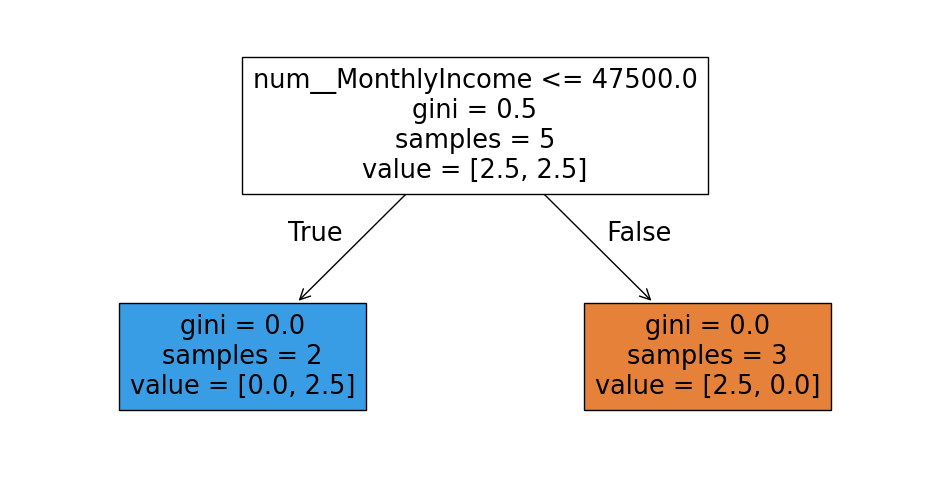

In [9]:
# Decision Tree Interpretability
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(
    model_pipeline.named_steps["classifier"],
    filled=True,
    feature_names=model_pipeline.named_steps["preprocess"].get_feature_names_out()
)
plt.show()


### Business Interpretation
**Key Insights**
- Overtime + low income → high attrition risk
- Long tenure + no overtime → stable employees

**HR Actions**
- Salary revision
- Workload balancing
- Targeted retention plans

## Complexity Analysis

```python
| Step          | Complexity       |
| ------------- | ---------------- |
| Preprocessing | O(n × f)         |
| Tree Training | O(n × f × log n) |
| Prediction    | O(depth)         |
```

- Space: O(n × f)

#### Thank You!!